## Library Imports

In [1]:
#pip install pandas
#pip install openpyxl 
#pip install pillow (to insert images)
#pip install quandl
#pip install matplotlib
#pip install seaborn

import pandas as pd 
from openpyxl import load_workbook, Workbook
from openpyxl.styles import Font, Alignment, colors, Border, Side, numbers, PatternFill
from openpyxl.drawing.image import Image
import quandl 
import seaborn as sns 
import matplotlib.pyplot as plt

## Create a Sample Dataframe

In [2]:
# retrieve recent inflation data from quandl
df = quandl.get(['RATEINF/INFLATION_USA', 'RATEINF/INFLATION_FRA', 'RATEINF/INFLATION_DEU'], 
                rows=15,
                returns='pandas.DataFrame') 

# sort to have the most recent dates at the top
df.reset_index(inplace=True)
df.sort_values(by='Date', ascending=False, inplace=True)

In [3]:
df.head()

,Date,RATEINF/INFLATION_USA - Value,RATEINF/INFLATION_FRA - Value,RATEINF/INFLATION_DEU - Value
14,2021-09-30,5.390,2.16,4.1
13,2021-08-31,5.251,1.87,3.9
12,2021-07-31,5.365,1.15,3.8
11,2021-06-30,5.391,1.48,2.3
10,2021-05-31,4.993,1.42,2.5


## Create a Chart

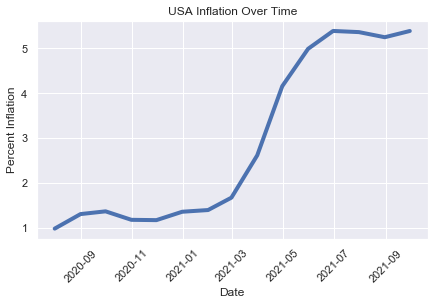

In [4]:
# create a seaborn plot of inflation for USA
plt.figure(figsize=(7,4))
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, 
                  x='Date',
                  y='RATEINF/INFLATION_USA - Value',
                  linewidth=4)
ax.set_title("USA Inflation Over Time")
ax.set_ylabel('Percent Inflation')
plt.xticks(rotation=45)
plt.show()

# save the chart figure as a .png
fig = ax.get_figure()
fig.savefig('chart_output.png', dpi=75, bbox_inches="tight")

## Export to Excel

In [5]:
# Read the existing workbook with openpyxl
# path = "C:\\Users\\admin\\Documents\\MEDIUM\\Python-to-Excel'\\Example_Report.xlsx" # EDIT THE PATH TO AN EXCEL WORKBOOK IN YOUR OWN SCRIPT
path = r"C:\Users\admin\Documents\MEDIUM\Python-to-Excel\Example_Report.xlsx"

workbook = load_workbook(path, 
                         read_only=False, 
                         keep_vba=False)

# Create a Pandas Excel writer object using openpyxl as the engine
writer = pd.ExcelWriter(path, 
                        engine='openpyxl')
writer.book = workbook

# Store the existing sheets to a dictionary of {title: worksheet object} pairs
writer.sheets = dict((ws.title, ws) for ws in workbook.worksheets)

# Select a worksheet to edit
ws = workbook['Report']

# Clear any pre-existing values within the following cell ranges
for row in ws['B3:E1000']:
    for cell in row:
        cell.value = None
        
# Convert the dataframe to openpyxl Excel object within the workbook
df.to_excel(writer, 
            sheet_name='Report', 
            float_format='%0.2f', 
            header=False, 
            index=False, 
            startrow=2, 
            startcol=1, 
            engine='openpyxl')

# Font formatting
font = Font(name='Arial',
            size=11,
            bold=True,
            color='404161') #HEX code

# Cell background Color
background_fill = PatternFill(start_color='F5E5B7', #HEX code
                               fill_type='solid')

# Border formatting
border = Border(left=Side(style='medium', color=colors.BLACK),
                right=Side(style='medium', color=colors.BLACK),
                top=Side(style='medium', color=colors.BLACK),
                bottom=Side(style='medium', color=colors.BLACK))

# Alignment formatting
alignment = Alignment(horizontal='center',
                      vertical='top',
                      wrapText=True)

# Define cell type (i.e. "General", "Text", etc) 
number_format = numbers.FORMAT_DATE_XLSX14 #mm-dd-yy

# Define the cell range to edit
cell_range = ws['B3:B17']

# Apply the formatting to the cell range
for row in cell_range:
    for cell in row:
        cell.font = font
        cell.fill = background_fill
        cell.border = border
        cell.alignment = alignment
        cell.number_format = number_format
        
chart_img = Image(img='chart_output.png')
chart_img.anchor = 'G4'
ws.add_image(chart_img)

# Save the workbook and close the writer
writer.save()
writer.close()

## Result <br> 
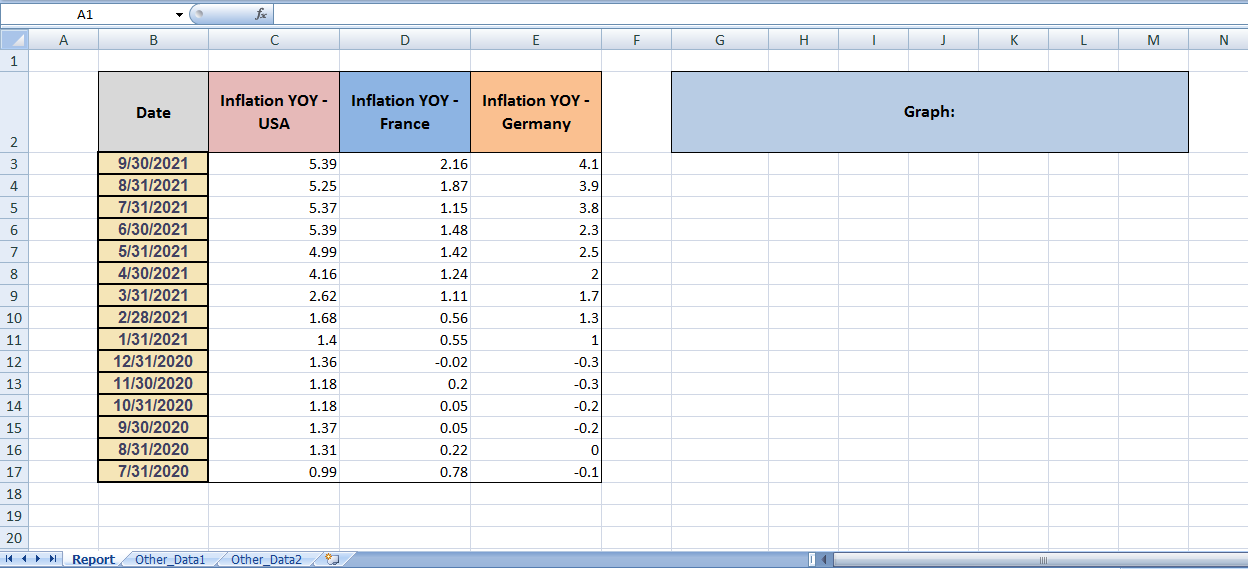